<a href="https://colab.research.google.com/github/AjitPandey-4/Mlops-assignment-2/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

Feature Engineering using StandardScaler

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load subset of dataset
subset_size = 5000
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_small = x_train[:subset_size].reshape(subset_size, -1)
x_test_small = x_test[:1000].reshape(1000, -1)

# Standard Scaling clearly
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_small)
x_test_scaled = scaler.transform(x_test_small)

print("Feature Engineering (Scaling) completed successfully.")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Feature Engineering (Scaling) completed successfully.


Training a simple model for SHAP analysis

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train a simple Random Forest Classifier clearly
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train_scaled, y_train[:subset_size])

print("Random Forest trained successfully.")


Random Forest trained successfully.


SHAP Explainability Analysis

<Figure size 640x480 with 0 Axes>

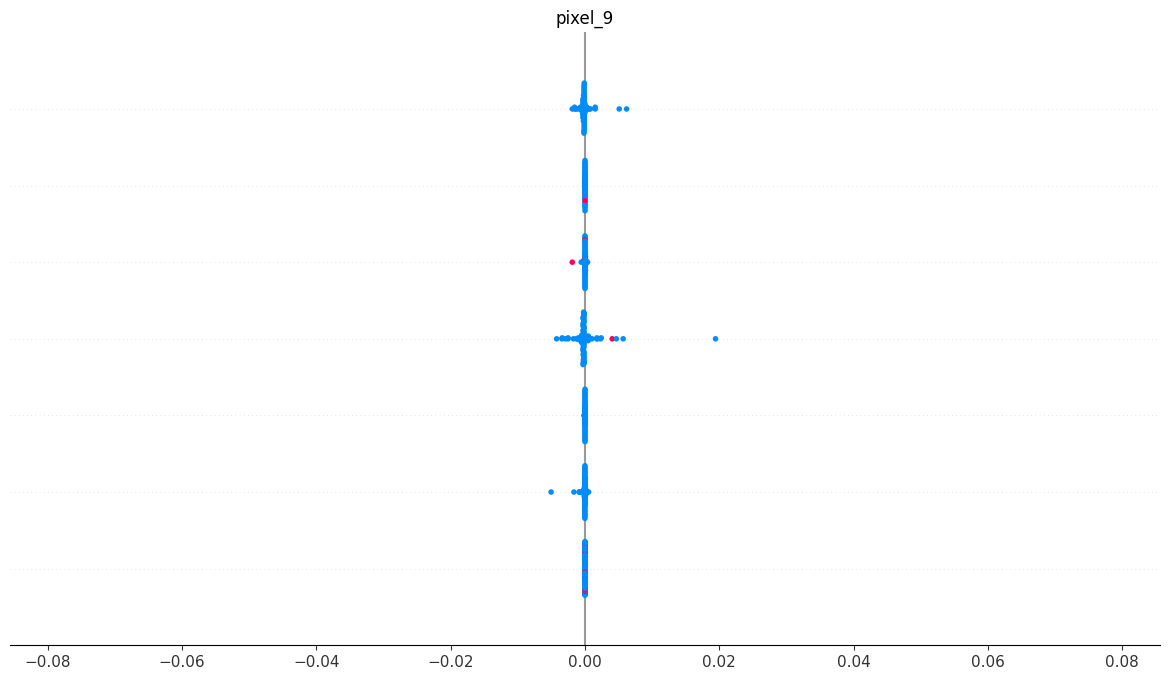

In [4]:
import shap

# Create SHAP explainer clearly
explainer = shap.TreeExplainer(model)

# Compute SHAP values (clearly on smaller subset for speed)
shap_values = explainer.shap_values(x_test_scaled[:100])

# SHAP summary plot clearly
shap.summary_plot(shap_values, features=x_test_scaled[:100], feature_names=[f'pixel_{i}' for i in range(x_test_scaled.shape[1])])
